In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # разбиение данных на тренировочные и тестовы

from sklearn.compose import ColumnTransformer # преобразование столбцов
from sklearn.preprocessing import OneHotEncoder # кодирование категориальных переменных

from sklearn.preprocessing import StandardScaler, MinMaxScaler # нормализация и масштабирование данных

from sklearn.linear_model import LinearRegression # Простая линейная регрессия
from sklearn.preprocessing import PolynomialFeatures # для полиномиальной регрессии
from sklearn.svm import SVR # метод опорных векторов
from sklearn.tree import DecisionTreeRegressor # Дерево решений
from sklearn.ensemble import RandomForestRegressor # Лес деревье решений

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

import gc

sns.set()
%matplotlib inline

import sys
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)

DISPLAY_MAX_ROWS = 100 #20
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)
pd.set_option('display.max_column', 100) # None)
plt.style.use('seaborn-whitegrid')


# plt.rcParams["figure.figsize"] = (20, 15)

import warnings
warnings.filterwarnings('ignore')

# ДЗ №1

1. Построить функцию линейной регрессии. Найти значение при $\alpha=20000$ с точностью двух знаков после запятой.
$$
\begin{array}{c|c|c|c|c|c|c|c}
t & 0 & 100 & 150 & 200 & 250 & 300 & 360
\\
\hline
\alpha & 18179 & 18216 & 18261 & 18323 & 18403 & 18500 & 18641
\end{array}
$$

2. Построить функцию линейной регрессии. Найти значение при $S=100$ с точностью двух знаков после запятой.
$$
\begin{array}{c|c|c|c|c|c|c|c|c}
\theta & 273 & 283 & 288 & 294 & 313 & 333 & 353 & 373
\\
\hline
S & 29,4 & 33,3 & 35,2 & 37,2 & 45,8 & 55,2 & 65,6 & 77,3
\end{array}
$$

3. Построить функцию линейной регрессии. Найти значение при $P=20$ с точностью двух знаков после запятой.
$$
\begin{array}{c|c|c|c|c|c|c|c}
\nu & 3,33 & 1,63 & 0,87 & 0,43 & 0,27 & 0,17 & 0,12
\\
\hline
P & 0,48 & 1,04 & 2,03 & 4,25 & 7,16 & 11,49 & 17,59
\end{array}
$$

4. Построить функцию линейной регрессии. Найти значение при $S=1$ с точностью двух знаков после запятой.
$$
\begin{array}{c|c|c|c|c|c|c|c}
V & 2,40 & 3,50 & 5,20 & 6,89 & 10,00 & 12,55 & 13,67
\\
\hline
S & 0,014 & 0,028 & 0,056 & 0,119 & 0,226 & 0,315 & 0,566
\end{array}
$$


**Визуализировать результаты на тестовых и тренировочных данных, посчитать метрики, вывести коэффициенты моделей**

In [ ]:
regressor = LinearRegression()

def predict(X, y, x_to_predict, rs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 3/7, random_state=rs, shuffle=True)
    regressor.fit(X_train, y_train)
    print(regressor.coef_, regressor.intercept_)
    # оченка точности модели. По умолчанию R_2)
    print(regressor.score(X_train, y_train), regressor.score(X_test, y_test))

    # Визуализация на тренировчных данных
    plt.scatter(X_train, y_train, color = 'red')
    plt.plot(X_train, regressor.predict(X_train), color = 'blue')
    plt.title('(Training set)')
    plt.xlabel('regressor')
    plt.ylabel('value')
    plt.show()

    # визуализация на тестовых данных
    plt.scatter(X_test, y_test, color = 'red')
    plt.plot(X_train, regressor.predict(X_train), color = 'blue')
    plt.title('(Test set)')
    plt.xlabel('regressor')
    plt.ylabel('value')
    plt.show()

    y_pred = regressor.predict(X_test)
    print(f'Средняя абсолютная ошибка: {mean_absolute_error(y_test, y_pred)}')
    print(f'средняя квадратичная ошибка: {mean_squared_error(y_test, y_pred)}')
    print(f'Коэффициент детерминации: {r2_score(y_test, y_pred)}')
    print(f'Медианная абсолютная ошибка: {median_absolute_error(y_test, y_pred)}\n')

    return regressor.predict(np.array([[x_to_predict]]))[0].round(2)

[0.741] -13414.670028805598
0.903469786416235 0.8900737605297531


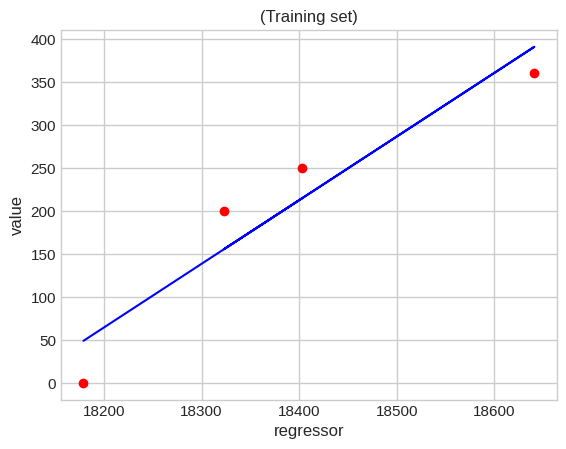

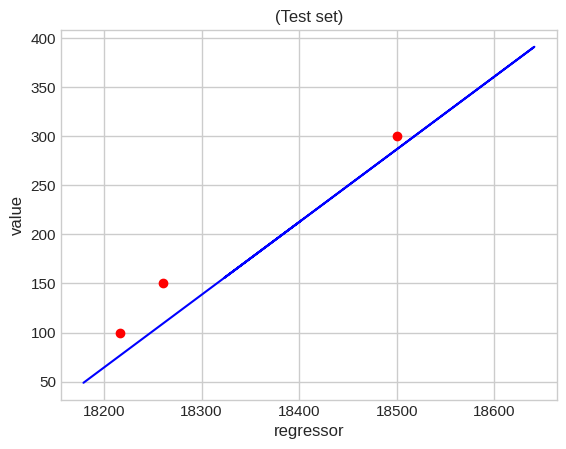

Средняя абсолютная ошибка: 25.88692392528962
средняя квадратичная ошибка: 793.9117295073391
Коэффициент детерминации: 0.8900737605297531
Медианная абсолютная ошибка: 23.77348815225014

Predicted result: a = 20000, t = 1397.47


In [ ]:
# 1
t = np.array([0, 100, 150, 200, 250, 300, 360]) # y
a = np.array([18179, 18216, 18261, 18323, 18403, 18500, 18641]).reshape(-1,1) # x
v_predicted = predict(a, t, 20000, rs = 100)
print("Predicted result: a = 20000, t =", v_predicted)

[2.061] 216.2498163325668
0.995215025619095 0.9730874121751804


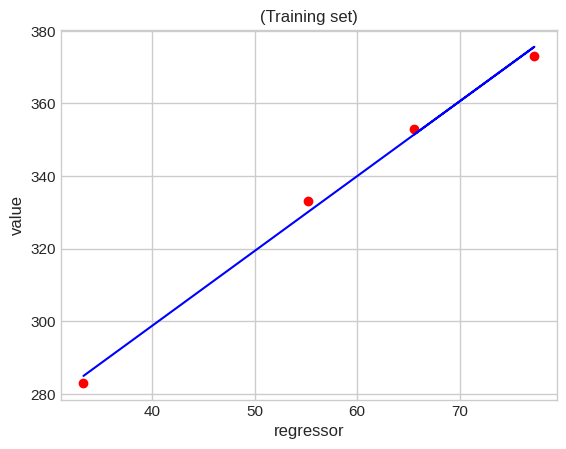

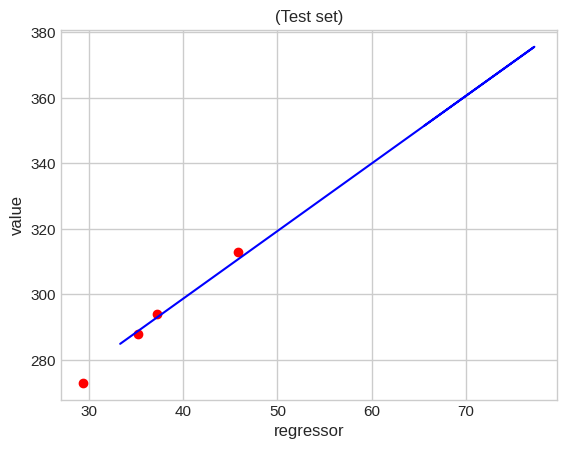

Средняя абсолютная ошибка: 2.0177036323216555
средняя квадратичная ошибка: 5.530536798000442
Коэффициент детерминации: 0.9730874121751804
Медианная абсолютная ошибка: 1.7033794807698257

Predicted result: S = 20, theta = 422.39


24845

In [ ]:
# 2
theta = np.array([273, 283, 288, 294, 313, 333, 353, 373])
S = np.array([29.4, 33.3, 35.2, 37.2, 45.8, 55.2, 65.6, 77.3]).reshape(-1,1)
theta_predicted = predict(S, theta, 100, rs = 257)
print("Predicted result: S = 20, theta =", theta_predicted)
gc.collect()

[-0.087] 1.3575728374627034
0.70228242697083 0.08595938717238671


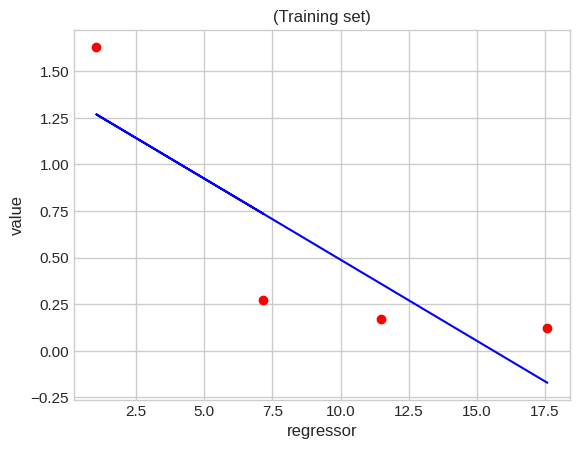

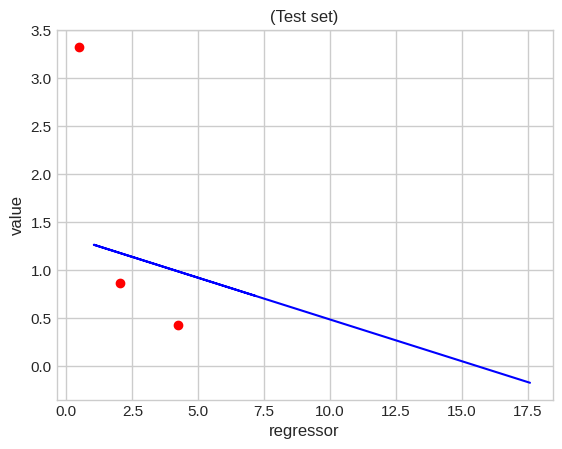

Средняя абсолютная ошибка: 0.96115008540303
средняя квадратичная ошибка: 1.4883831099012488
Коэффициент детерминации: 0.08595938717238671
Медианная абсолютная ошибка: 0.5581726701647969

Predicted result: P = 20, v = -0.38


3847

In [ ]:
# 3
v = np.array([3.33, 1.63, 0.87, 0.43, 0.27, 0.17, 0.12])
P = np.array([0.48, 1.04, 2.03, 4.25, 7.16, 11.49, 17.59]).reshape(-1,1)
v_predicted = predict(P, v, 20, rs = 257)
print("Predicted result: P = 20, v =", v_predicted)
gc.collect()

# на этом примере очевидно, что просто линейная регрессия - не подходящая модель

[18.784] 3.8960864164670417
0.8852652024925006 0.8183825265066178


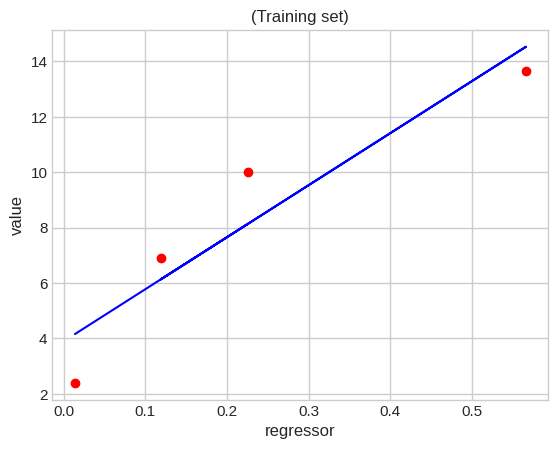

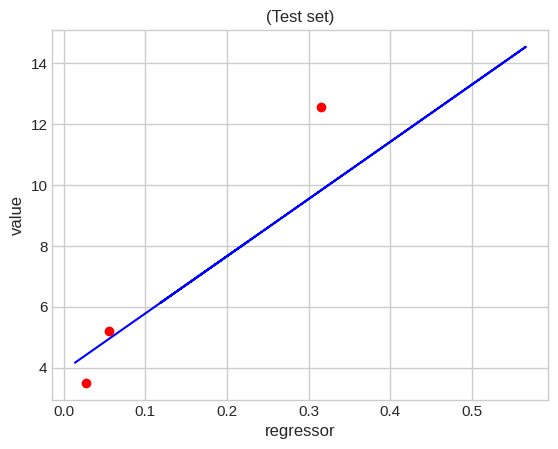

Средняя абсолютная ошибка: 1.303611037175051
средняя квадратичная ошибка: 2.8012477314426505
Коэффициент детерминации: 0.8183825265066178
Медианная абсолютная ошибка: 0.9220521692840054

Predicted result: S = 1, V = 22.68


3430

In [ ]:
# 4
V = np.array([2.40, 3.50, 5.20, 6.89, 10.00, 12.55, 13.67])
S = np.array([0.014, 0.028, 0.056, 0.119, 0.226, 0.315, 0.566]).reshape(-1,1)
V_predicted = predict(S, V, 1, rs = 100)
print("Predicted result: S = 1, V =", V_predicted)
gc.collect()

# ДЗ №2
В папке `practice_4` есть ноутбук EDA_AUTO. В этом ноутбуке проведен разведочный анализ данных, поиск и замена пропусков, визуализация данных, поиск выбросов/аномалий. Выполнить следующие задания:

1. Изучить ноутбук самостоятельно.
2. Столбец `price` - отклик, таргет. Остальные предикторы.
3. Столбец `make` не использовать для моделирования.  
4. Построить модель линейной регрессии и полиномиальной регрессии `price~horsepower`. Т.е. `price` - целевой отклик, `horsepower` - предиктор.
5. Построить модели множественной регрессии, SVM, Decision Tree, Random Forest, используя только числовые предикторы.
6. Построить модели множественной регрессии, SVM, Decision Tree, Random Forest, используя совместно с категориальными и числовыми предикторами.
7. Сравнить между собой модели. Рассчитать метрики и сделать визуализации
8. Использовать масштабирование признаков StandardScaler, и преобразование категориальных переменных

Для сокращения времени разработки рекомендую использовать  [Pipeline()](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline) или [make_pipeline()](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline)

Руководства на [русском](https://scikit-learn.ru/6-1-pipelines-and-composite-estimators/) и [английском](https://scikit-learn.org/stable/modules/compose.html) языках

[Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html) - отбор признаков перед подачей в модель

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor


import gc

sns.set()
%matplotlib inline

import sys
np.set_printoptions(suppress=True)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)

DISPLAY_MAX_ROWS = 100 #20
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)
pd.set_option('display.max_column', 100) # None)
plt.style.use('seaborn-whitegrid')


# plt.rcParams["figure.figsize"] = (20, 15)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
columns = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
           "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width",
           "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size",
           "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
           "city-mpg", "highway-mpg", "price"]
df = pd.read_csv(url, names=columns, na_values="?")

## Подготовка и анализ данных

In [ ]:
df.describe(include=['object'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,205,205,205,203,205,205,205,205,205,205
unique,22,2,2,2,5,3,2,7,7,8
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,185,168,114,96,120,202,148,159,94


<Axes: xlabel='count', ylabel='fuel-system'>

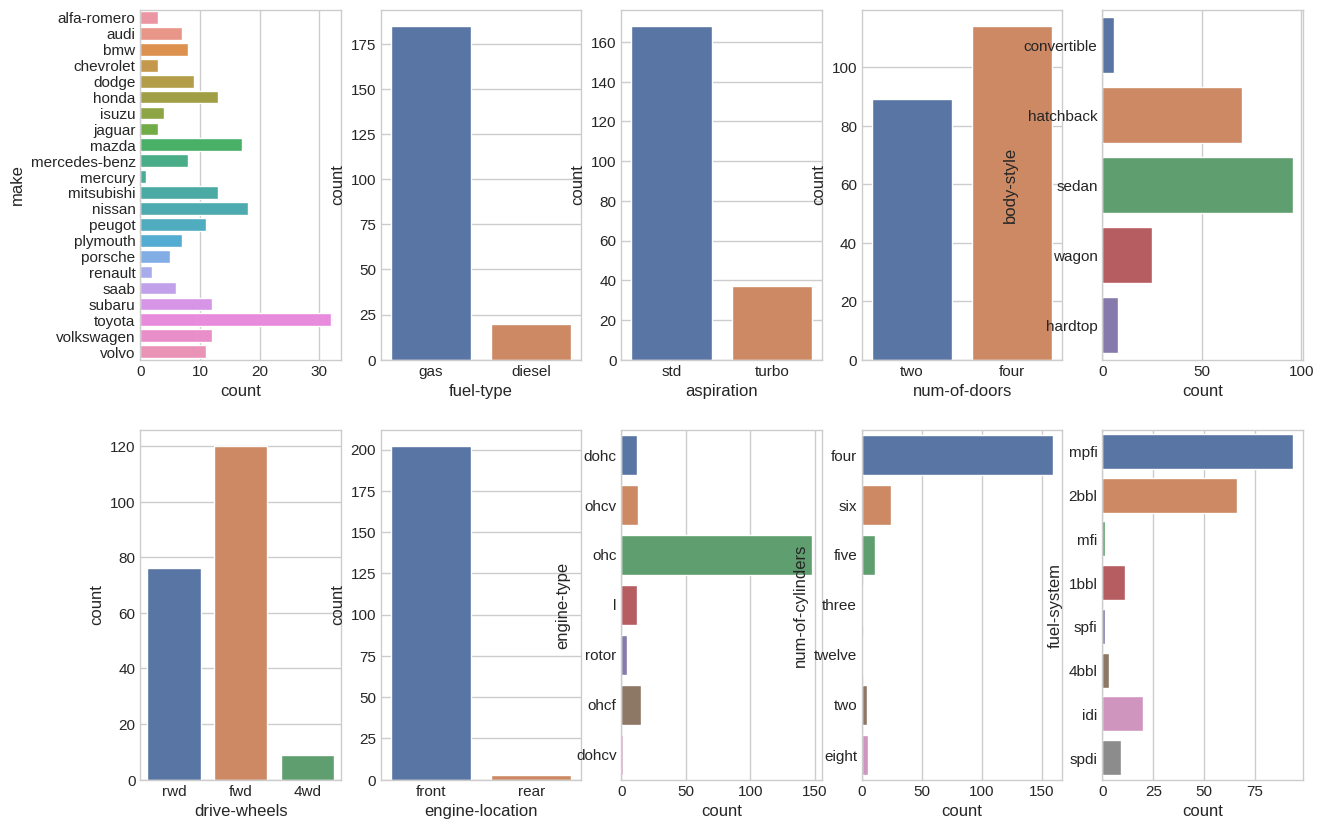

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
sns.countplot(y = df['make'], data = df, ax=axes[0, 0])
sns.countplot(x = df['fuel-type'], data = df, ax=axes[0, 1])
sns.countplot(x = df['aspiration'], data = df, ax=axes[0, 2])
sns.countplot(x = df['num-of-doors'], data = df, ax=axes[0, 3])
sns.countplot(y = df['body-style'], data = df, ax=axes[0, 4])
sns.countplot(x = df['drive-wheels'], data = df, ax=axes[1, 0])
sns.countplot(x = df['engine-location'], data = df, ax=axes[1, 1])
sns.countplot(y = df['engine-type'], data = df, ax=axes[1, 2])
sns.countplot(y = df['num-of-cylinders'], data = df, ax=axes[1, 3])
sns.countplot(y = df['fuel-system'], data = df, ax=axes[1, 4])

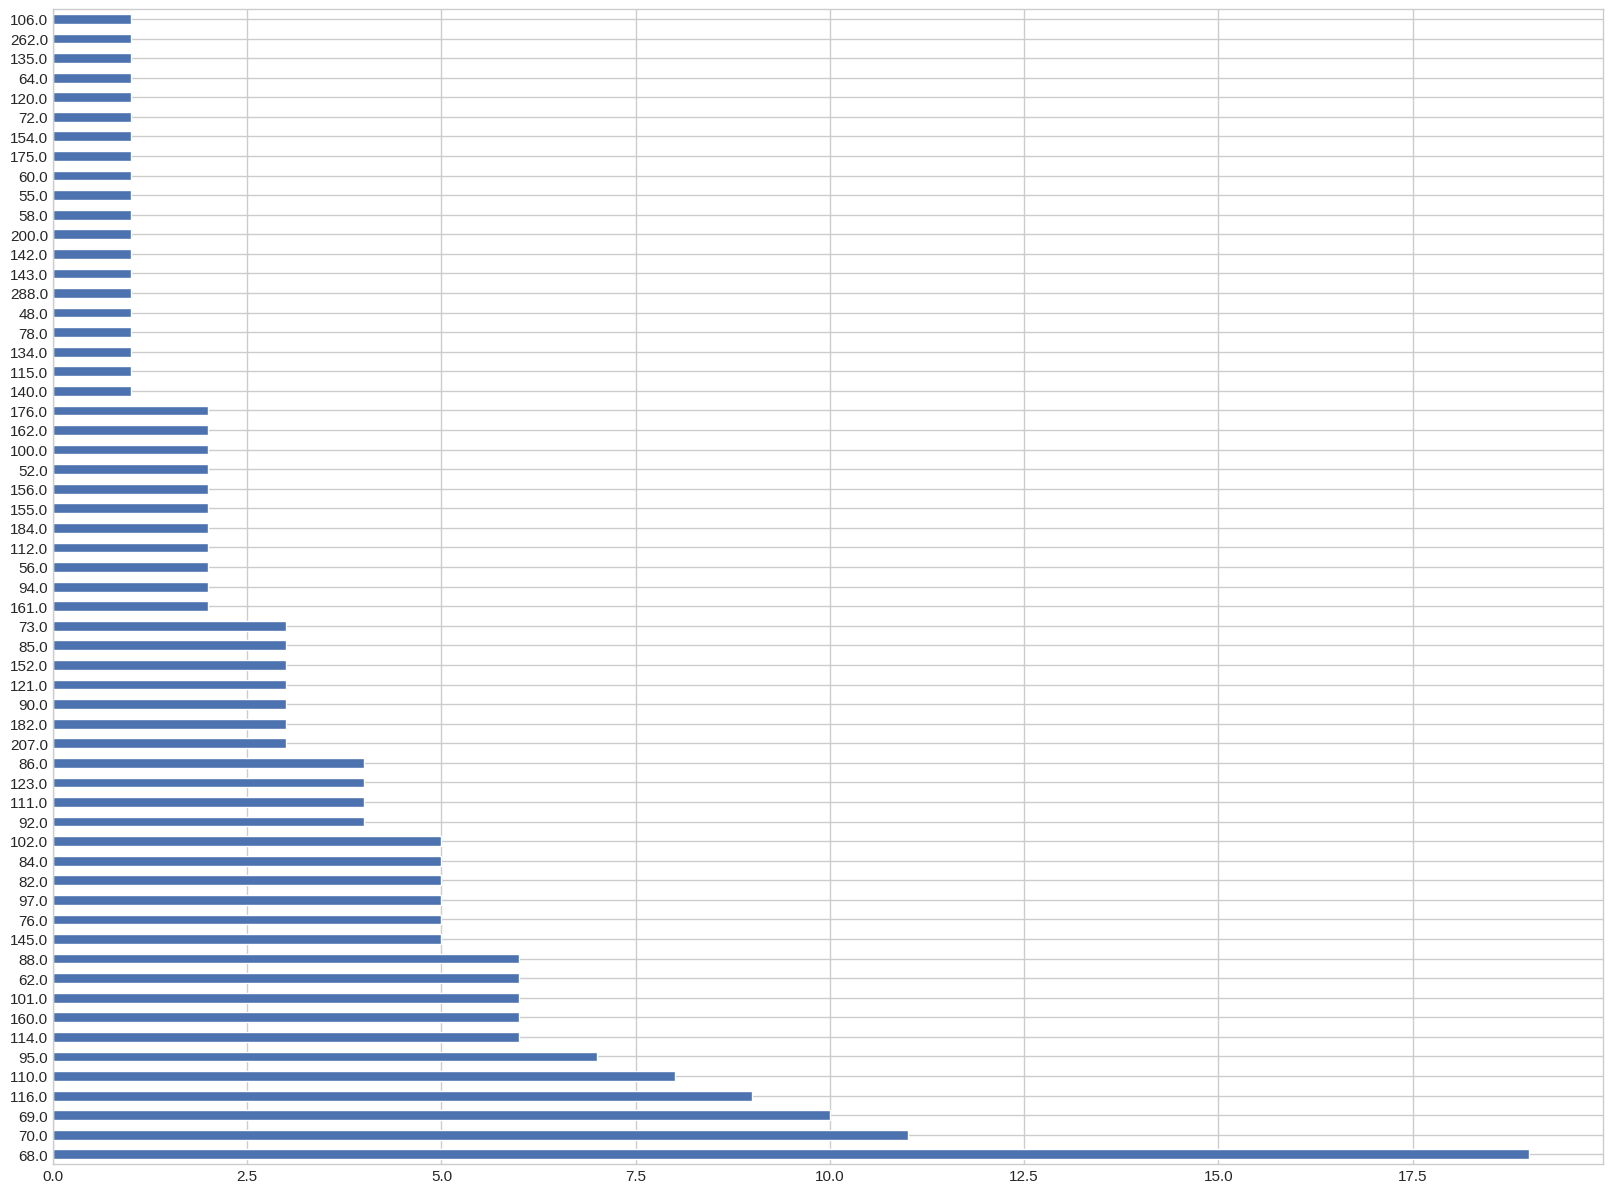

In [ ]:
nunique_horsepower = df['horsepower'].value_counts()
axes = nunique_horsepower.plot(kind='barh', figsize=(20, 15))

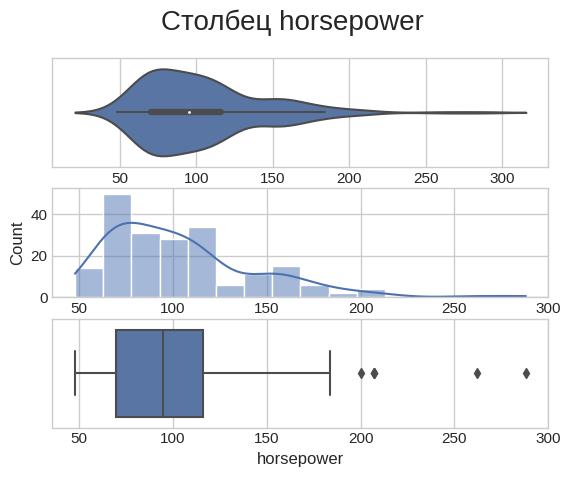

In [ ]:
# Визуализация лошадиных сил по автомобилям
fig, ax = plt.subplots(3, 1) # figsize=(10,5))
fig.suptitle(f'Столбец horsepower', fontsize=20)
sns.violinplot(ax=ax[0], x=df['horsepower'])
sns.histplot(x=df['horsepower'], kde=True, ax=ax[1])
sns.boxplot(x=df['horsepower'])
plt.show()

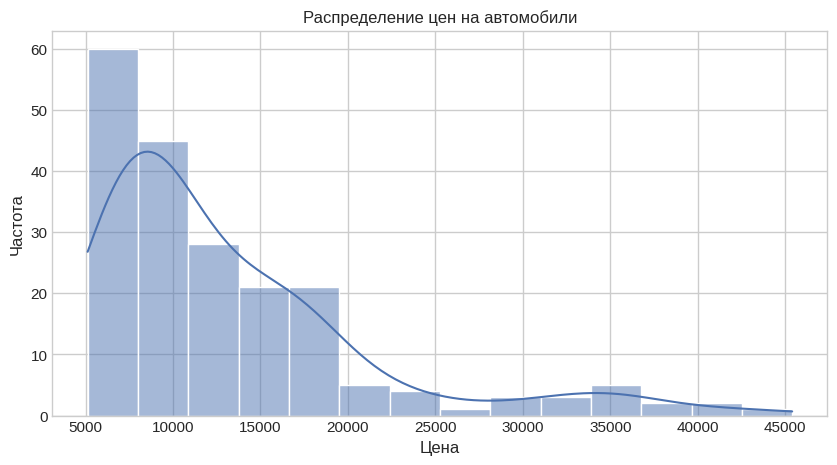

In [ ]:
# Визуализация данных Распределение цен на автомобили
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], kde=True)
plt.title('Распределение цен на автомобили')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

**перед выбором предикторов цены изучим их корреляцию**

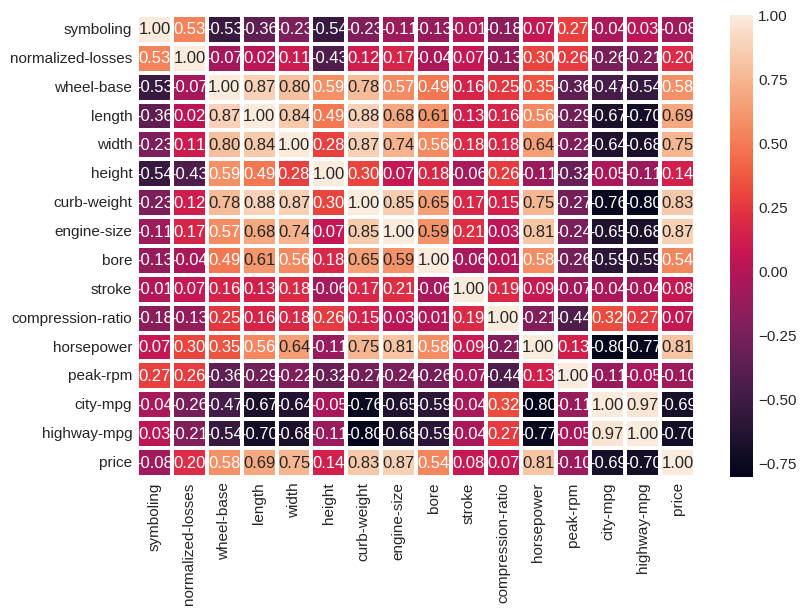

In [ ]:
corr = df.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

**хочу выделить 3 признака с высоким значением корреляции для цены(price):**\
curb-weight(масса) - 0.83\
engine-size(объём движка) - 0.87\
horsepower - 0.81

### Обработка пропусков

In [ ]:
df = df.drop('make', axis=1)

# пропуски в категориальных переменных заполним модой
df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

# остальное заполним или средним значением или медианой. Выберем медиану
df.fillna(df.mean(), inplace=True)


### Выбросы

In [ ]:
# Статистический метод (метод межквартильного размаха) - функция для поиска outliers
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [ ]:
df_outliers = find_outliers_IQR(df)

# статистика outliers
stat_outliers = pd.DataFrame({'number': df_outliers.notnull().sum(),
    'min': df.min(),
    'max': df.max(),
    'mean': df.mean(),
    'median':df.median()})

stat_outliers

,number,min,max,mean,median
aspiration,0,std,turbo,NaN,NaN
body-style,0,convertible,wagon,NaN,NaN
bore,0,2.54,3.94,3.329751,3.31
city-mpg,2,13,49,25.219512,24.00
compression-ratio,28,7.0,23.0,10.142537,9.00
curb-weight,0,1488,4066,2555.565854,2414.00
drive-wheels,0,4wd,rwd,NaN,NaN
engine-location,0,front,rear,NaN,NaN
engine-size,10,61,326,126.907317,120.00
engine-type,0,dohc,rotor,NaN,NaN


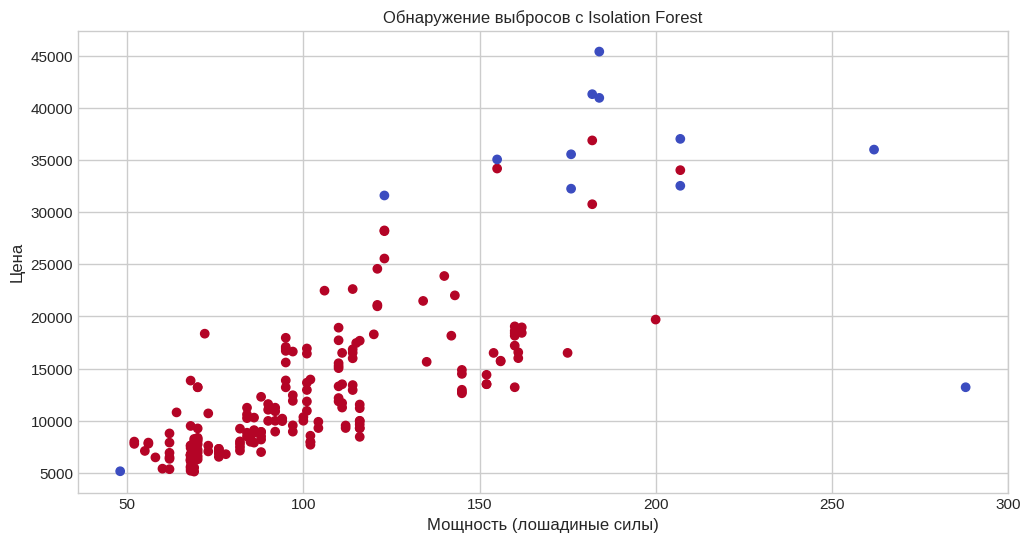

In [ ]:
# Обнаружение выбросов с использованием Isolation Forest
clf = IsolationForest(contamination=0.056, random_state=42)
outliers_iforest = clf.fit_predict(df[['price', 'curb-weight', 'engine-size', 'horsepower']])
#df['outlier_iforest'] = outliers_iforest

# Визуализация выбросов с Isolation Forest
plt.figure(figsize=(12, 6))
plt.scatter(df['horsepower'], df['price'], c=outliers_iforest, cmap='coolwarm')
plt.title('Обнаружение выбросов с Isolation Forest')
plt.xlabel('Мощность (лошадиные силы)')
plt.ylabel('Цена')
plt.show()

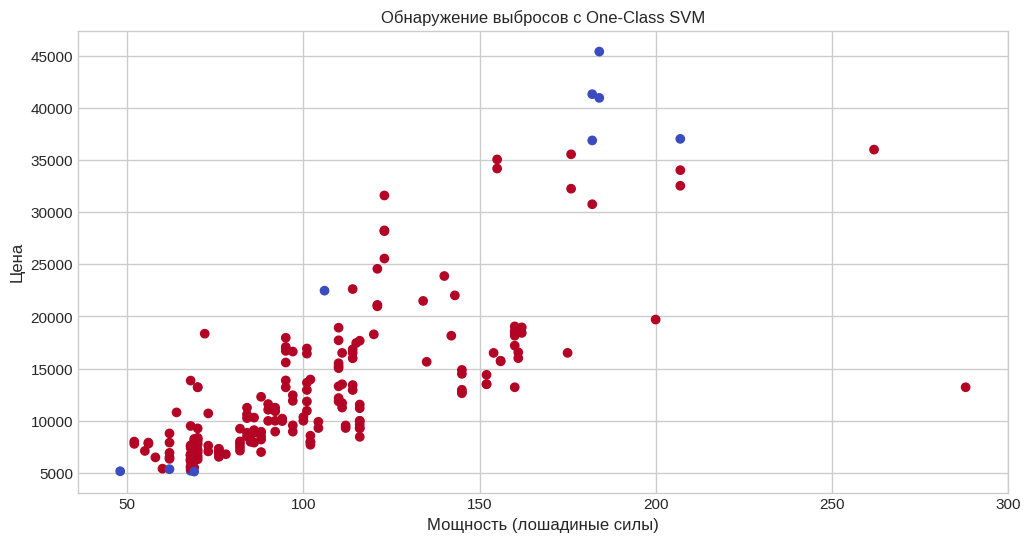

In [ ]:
# Обнаружение выбросов с использованием One-Class SVM
model_svm = OneClassSVM(nu=0.0565535)
outliers_svm = model_svm.fit_predict(df[['price', 'curb-weight', 'engine-size', 'horsepower']])
#df['outlier_svm'] = outliers_svm

# Визуализация выбросов с One-Class SVM
plt.figure(figsize=(12, 6))
plt.scatter(df['horsepower'], df['price'], c=outliers_svm, cmap='coolwarm')
plt.title('Обнаружение выбросов с One-Class SVM')
plt.xlabel('Мощность (лошадиные силы)')
plt.ylabel('Цена')
plt.show()

## Сравнение моделей

In [ ]:
count_columns = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']

category_columns = ['fuel-type', 'symboling', 'aspiration', 'num-of-doors', 'body-style',
                    'drive-wheels', 'engine-location', 'engine-type',
                    'num-of-cylinders', 'fuel-system' ]

all_columns = count_columns + category_columns

# Преобразование категориальных переменных
# мы создаем бинарные признаки для всех уникальных значений
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), category_columns)], remainder='passthrough')

count_predictors = df[count_columns].values
all_predictors = ct.fit_transform(df[all_columns])

In [ ]:
# глянем количество признаков у предикторов
count_predictors.shape, all_predictors.shape

((205, 14), (205, 58))

In [ ]:
X = df['horsepower'].values.reshape((-1,1))
y = df['price'].values

In [ ]:
def show_differences(regressor, count_predictors, all_predictors, y, model_name:str):
    regressor.fit(count_predictors, y)

    fig, ax = plt.subplots(1, 2, figsize=(15, 7))
    fig.subplots_adjust(hspace=0.5) # отступ между графиками

    # числовое предиктор
    y_predicted = regressor.predict(count_predictors)
    score = regressor.score(count_predictors, y).round(5)
    ax[0].plot(y, color='red', marker='.', linestyle='dashed', linewidth=1, markersize=10, label='real price')
    ax[0].plot(y_predicted, color = 'blue', marker='.',linestyle='dashed', linewidth=1, markersize=10, alpha=0.5, label='predicted price')
    ax[0].set_title(f'{model_name} c числовыми предикторами: {str(score)}')

    # комбинированный предиктор
    regressor.fit(all_predictors, y)
    y_predicted = regressor.predict(all_predictors)
    score = regressor.score(all_predictors, y).round(5)
    ax[1].plot(y, color='red', marker='.', linestyle='dashed', linewidth=1, markersize=10, label='real price')
    ax[1].plot(y_predicted, color = 'blue', marker='.',linestyle='dashed', linewidth=1, markersize=10, alpha=0.5, label='predicted price')
    ax[1].set_title(f'{model_name} c комбинированными предикторами: {str(score)}')
    plt.legend()
    plt.show()

### Линейная регрессия

[150.911] -2526.2431117497745
0.5744381087814032


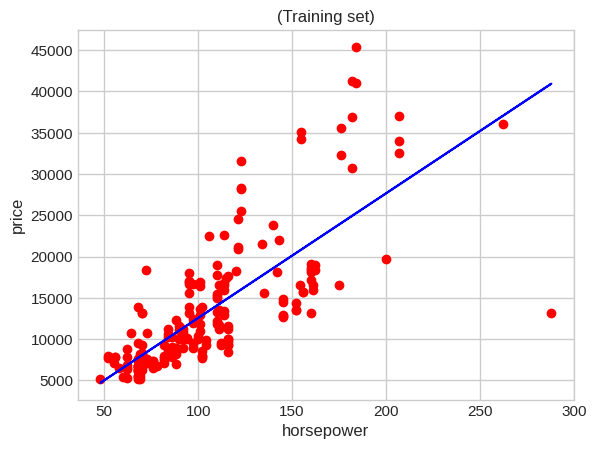

In [ ]:
lin_regressor = LinearRegression().fit(X, y)
print(lin_regressor.coef_, lin_regressor.intercept_)
print(lin_regressor.score(X,y))

# Визуализация на тренировчных данных
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_regressor.predict(X), color = 'blue')
plt.title('(Training set)')
plt.xlabel('horsepower')
plt.ylabel('price')
plt.show()

**модель линейной регрессии не обладает сильной предсказательной способностью**

### Полиномиальная регрессия

In [ ]:
poly_features = PolynomialFeatures(degree = 6) # полиномиальная регрессия
X_poly = poly_features.fit_transform(X)
poly_reg_model = LinearRegression().fit(X_poly, y)
print(poly_reg_model.score(X_poly, y))

0.6669109892593151


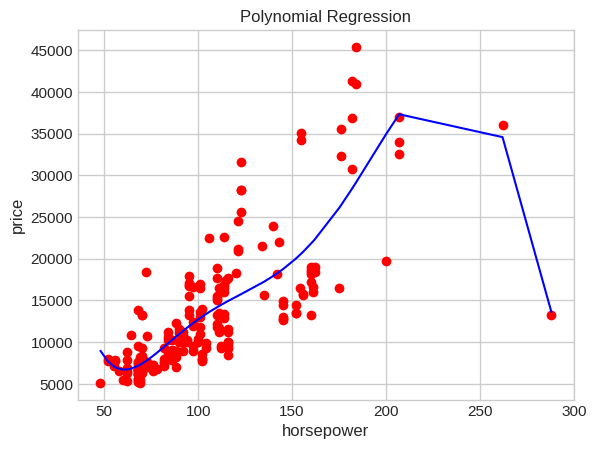

0.6669109892593151


In [ ]:
# # Визуализация полиномиальной регрессии
plt.scatter(X, y, color = 'red')
X_sorted = np.sort(X, 0)
plt.plot(X_sorted, poly_reg_model.predict(poly_features.fit_transform(X_sorted)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('horsepower')
plt.ylabel('price')
plt.show()

print(poly_reg_model.score(X_poly, y))

### Множественная регрессия

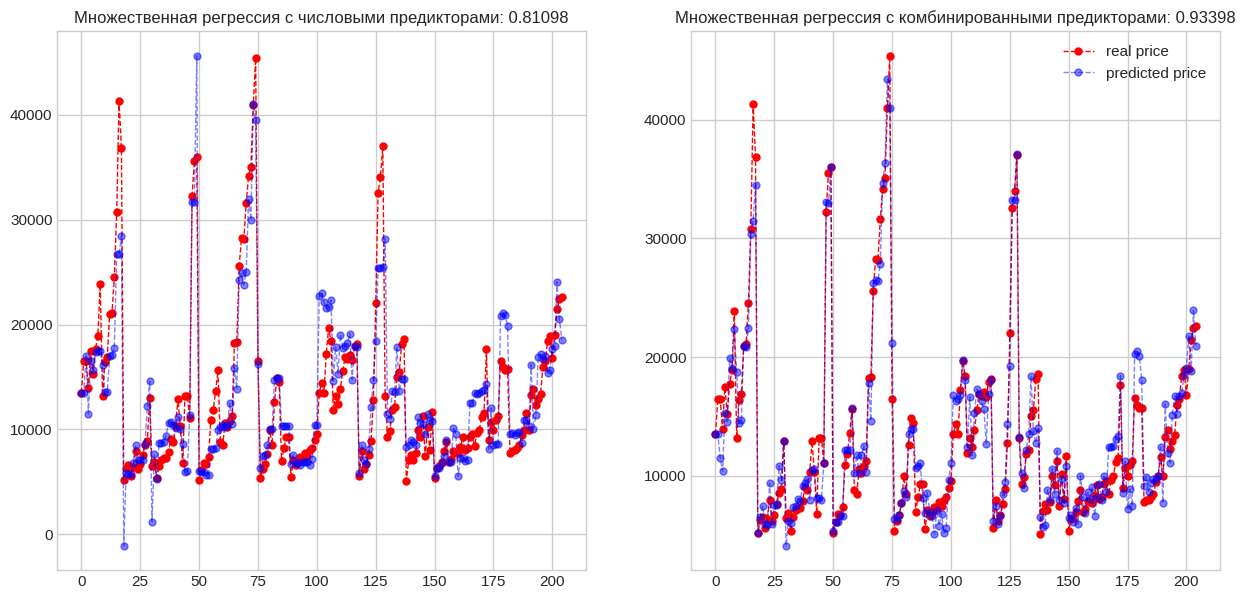

In [ ]:
multiple_reg_count = LinearRegression()
show_differences(multiple_reg_count, count_predictors, all_predictors, y, 'Множественная регрессия')

### SVM

In [ ]:
# Масштабирование признаков
sc = StandardScaler()
X_count = sc.fit_transform(count_predictors)
X_all = sc.fit_transform(all_predictors)
y_t = sc.fit_transform(y.reshape(-1,1))

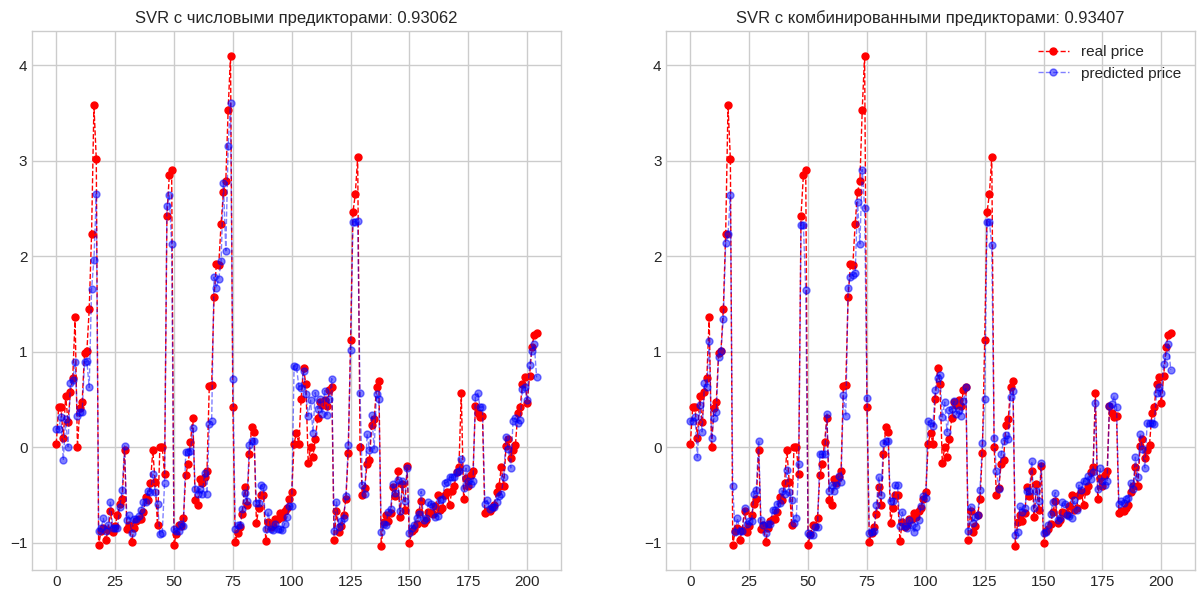

In [ ]:
regressor = SVR(kernel = 'rbf')
show_differences(regressor, X_count, X_all, y_t, 'SVR')

### Decision Tree

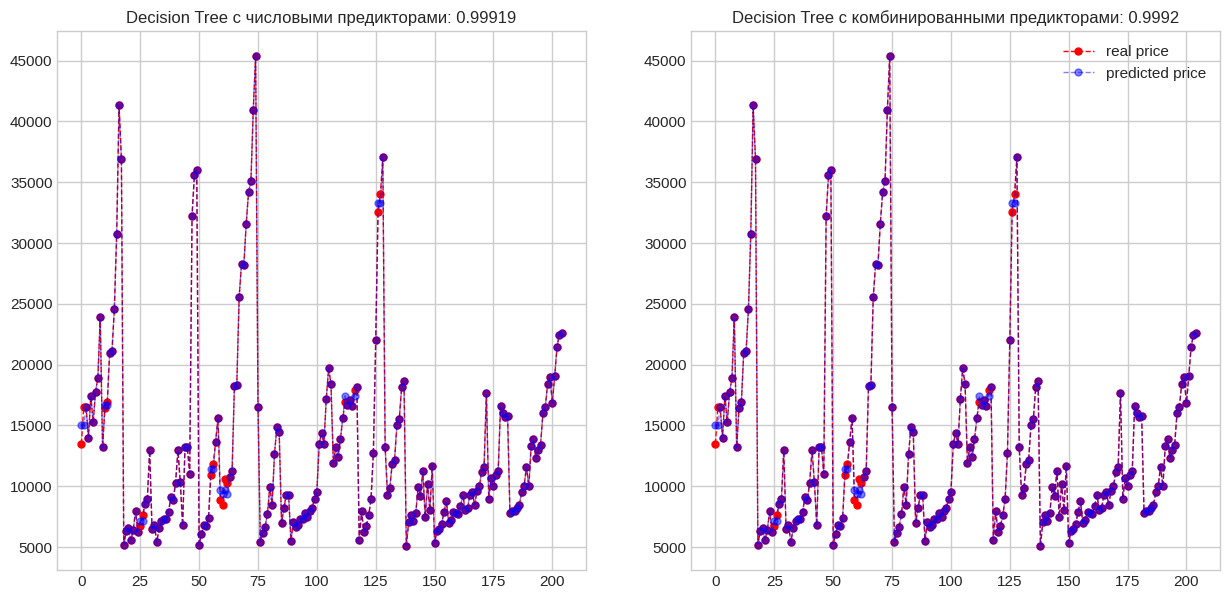

In [ ]:
regressor = DecisionTreeRegressor(random_state = 0)
show_differences(regressor, count_predictors, all_predictors, y, 'Decision Tree')

### Random Forest

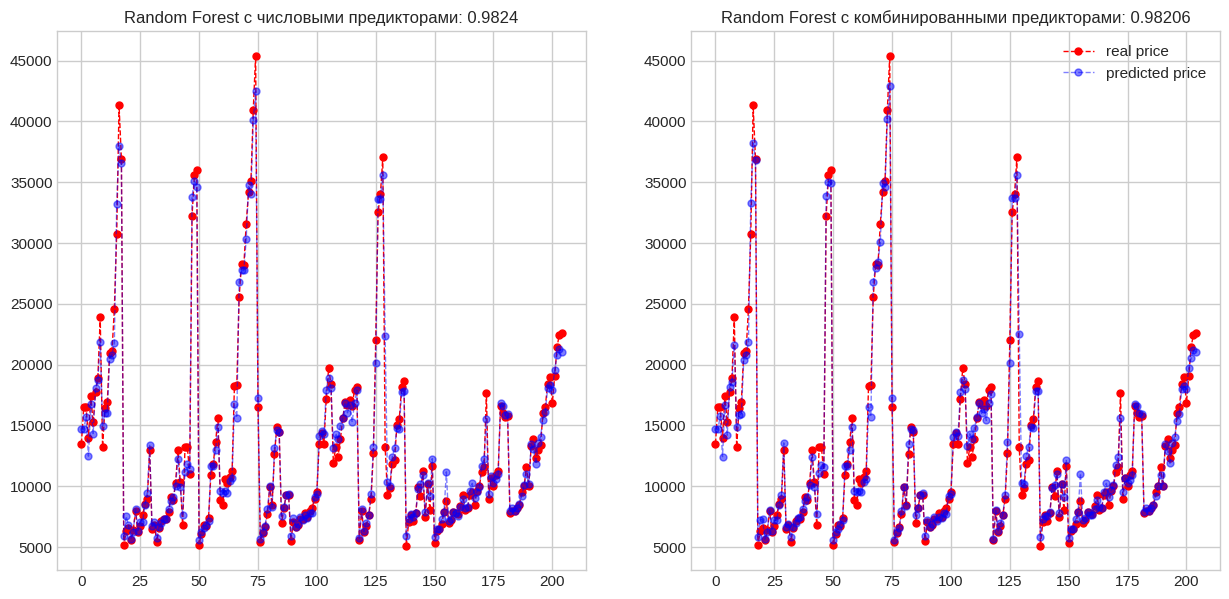

In [ ]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)
show_differences(regressor, count_predictors, all_predictors, y, 'Random Forest')